[View in Colaboratory](https://colab.research.google.com/github/lariskelmer/ect2702-ml/blob/master/regressao.ipynb)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0
Coefficient: [9922.40861003]

Mean squared error: 47078259.46


Varian

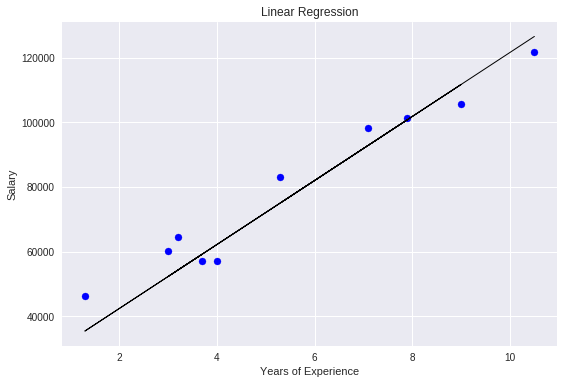

In [13]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

FILE_TO_DOWNLOAD =  "Salary_Data.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD
#forma de dar um up nos dados

#forma para fazer a leitura dos dados no local:
#salary_data = pd.read_csv("../data/salary_data.csv")
#importando arquivo csv pro Python using read_csv() da biblioteca pandas


def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  
  if not os.path.isdir(data_path):
   #caso o diretório não exista no path
    
    os.makedirs(data_path)
    #cria-se um diretório no computador (ou local ou uma máquina virtual: o que
    #vai entre parênteses ou é uma string com o caminho acrescentando, ao fim, 
    #o nome do diretório a ser criado, ou é o nome do diretório que irá pra 
    #aonde se está)
    
  urllib.request.urlretrieve(data_url, data_path+"Salary_Data.csv") 
  #faz uma requisição em 1 e joga em 2  
fetch_data()


def up_data(data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  
  csv_path = os.path.join(data_path,file_to_download)
  
  return pd.read_csv(csv_path)


salary_data = up_data()
print(salary_data)

salary_data=shuffle(salary_data)
#embaralhar e alocar na mesma variável


#https://stackoverflow.com/questions/35076223/how-to-randomly-shuffle-data-and-target-in-python

#Separando os dados para a variável independente e para variável dependete 
salary_x_data = salary_data.iloc[:,:-1].values
salary_y_data = salary_data.iloc[:, 1].values

#Separa os dados para treino e teste
salary_x_train = salary_x_data[:20, :]
#pega os 20 últimos em x
salary_x_test = salary_x_data[-10:, :]
#pega os 10 primeiros em x

salary_y_train = salary_y_data[:20]
#pega os 20 últimos em y
salary_y_test = salary_y_data[-10:]
#pega os 20 últimos em y

model = linear_model.LinearRegression()

#Treina o modelo
model.fit(salary_x_train, salary_y_train)

#Predições para os dados de teste
salary_y_predct = model.predict(salary_x_test)

#Coeficientes do modelo
print("Coefficient: %s\n" % model.coef_)

#Erro médio quadrado
print('Mean squared error: %.2f\n\n' % mean_squared_error(salary_y_test, salary_y_predct))

# Variância (1 classificação perfeita)
print('Variance score:%.2f\n\n' % r2_score(salary_y_test, salary_y_predct))

# Plota os resultados

plt.title('Linear Regression') 
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.scatter(salary_x_test, salary_y_test, color='blue')
plt.plot(salary_x_test, salary_y_predct, color='black', linewidth=1)

plt.tight_layout()
plt.show()